# Week 7: Autoencoders and Generative Adversarial Neural Networks (GANs)

Beyond neural networks for classification and regression, there is a world of interesting neural network research with very cool applications. In todays lecture we have talked about *latent spaces* and their importance in 
*generative models*. Generative models are, as the name suggests, models which define a procedure for *generating* data that look similar to the trianing data. They learn the underlying structure of the data, a (lower-dimensional) structure that can be explored to obtain new datapoints.

## Exercises

In [5]:
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras import layers, losses
from tensorflow.keras.layers import Dense, Flatten, Reshape, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU, Input, BatchNormalization

### Autoencoder

> **Ex. 7.1.2**: What is the "bottleneck" of an autoencoder? How can you use the autoencoder to encode and decode data once it has been trained?

The "bottleneck" of an autoencoder is the layer in the architecture with the least amount of neurons, where it's most condensed. The first half of the autoencoder encodes inputs by compressing the input it into fewer dimensions (a representation of the image in the latent space) while the second half of the autoencoder decodes the compressed input (interprests the latent space representation), restoring it as best as possible to its original form. 

In [10]:
diabetes = pd.read_csv('Diabetes2021/diabetes_binary_5050split_health_indicators_BRFSS2021.csv')

X = diabetes.drop(columns=['Diabetes_binary'])
Y = diabetes['Diabetes_binary']

X = X.values
y = Y.values

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply the same scaler to testing data
X_test = scaler.transform(X_test)

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7372654155495979
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.72      0.73      6614
         1.0       0.73      0.76      0.75      6814

    accuracy                           0.74     13428
   macro avg       0.74      0.74      0.74     13428
weighted avg       0.74      0.74      0.74     13428

Confusion Matrix:
 [[4731 1883]
 [1645 5169]]


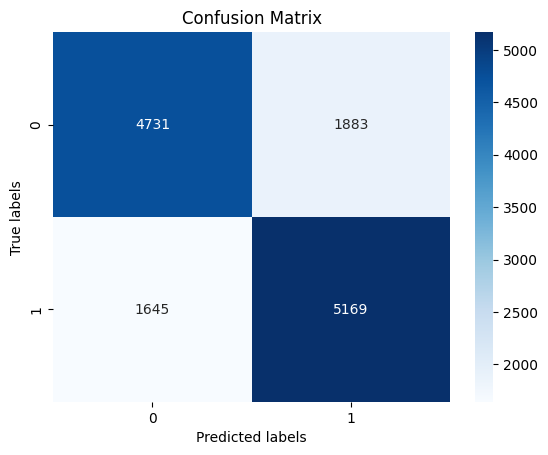

In [12]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.savefig("lregCM")
plt.show()